# Feature Importance

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
meanImpute = SimpleImputer(strategy="mean")

In [ ]:
meanImpute.fit(data[['bmi']])

SimpleImputer()

In [ ]:
data[['bmi']] = meanImpute.transform(data[['bmi']])

In [ ]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Feature Importance for Classification Problem

In [ ]:
X = data.drop(['stroke'], axis=1)
y = data[['stroke']]

In [ ]:
# Division into Categorical and Numerical Columns

dataCat = X.select_dtypes(object)
dataNum = X.select_dtypes(np.number)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
dataCatEncoded = dataCat.apply(le.fit_transform)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

## For Categorical Columns and Target Variable

### Using Chi Square Values

In [ ]:
chiScore = SelectKBest(score_func=chi2, k='all')
chiScore.fit(dataCatEncoded, y)
X_chi2 = chiScore.transform(dataCatEncoded)

Feature 0: 0.239001
Feature 1: 20.622787
Feature 2: 2.925901
Feature 3: 0.600717
Feature 4: 3.369423


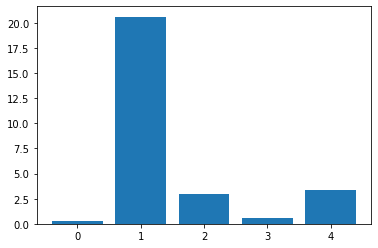

In [ ]:
from matplotlib import pyplot
for i in range(len(chiScore.scores_)):
	print('Feature %d: %f' % (i, chiScore.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(chiScore.scores_))], chiScore.scores_)
pyplot.show()

### Using Mutual Information Score

In [ ]:
mf = SelectKBest(score_func=mutual_info_classif, k='all')
mf.fit(dataCatEncoded, y)
X_mf = mf.transform(dataCatEncoded)

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Feature 0: 0.002229
Feature 1: 0.006966
Feature 2: 0.004439
Feature 3: 0.000959
Feature 4: 0.000000


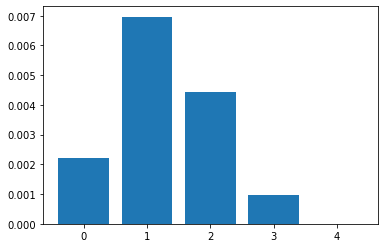

In [ ]:
for i in range(len(mf.scores_)):
	print('Feature %d: %f' % (i, mf.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(mf.scores_))], mf.scores_)
pyplot.show()

## For Numerical Columns and Target Variable

### Using ANOVA scores

In [ ]:
from sklearn.feature_selection import f_classif

Feature 0: 0.208459
Feature 1: 326.916568
Feature 2: 84.953542
Feature 3: 94.698406
Feature 4: 90.503870
Feature 5: 7.759776


/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


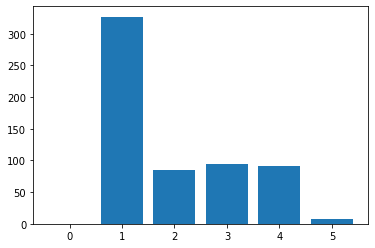

In [ ]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(dataNum, y)
X_fs = fs.transform(dataNum)

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### Using Kendall Correlation

In [ ]:
pd.concat([dataNum, y], axis=1).corr(method="kendall").style.background_gradient(cmap ='viridis')\
        .set_properties(**{'font-size': '20px'})

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.002365,0.002901,-0.000984,-0.035023,0.002876,0.005307
age,0.002365,1.000000,0.230582,0.221528,0.097858,0.246469,0.205017
hypertension,0.002901,0.230582,1.000000,0.108306,0.093128,0.132981,0.127904
heart_disease,-0.000984,0.221528,0.108306,1.000000,0.086856,0.053492,0.134914
avg_glucose_level,-0.035023,0.097858,0.093128,0.086856,1.000000,0.076055,0.067404
bmi,0.002876,0.246469,0.132981,0.053492,0.076055,1.000000,0.045039
stroke,0.005307,0.205017,0.127904,0.134914,0.067404,0.045039,1.000000


# Feature Importance for Regression Analysis

In [ ]:
X = data.drop(['avg_glucose_level'], axis=1)
y = data[['avg_glucose_level']]

# Division into Categorical and Numerical Columns

dataCat = X.select_dtypes(object)
dataNum = X.select_dtypes(np.number)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dataCatEncoded = dataCat.apply(le.fit_transform)

In [ ]:
dataCatEncoded = pd.concat([dataCatEncoded, dataNum[['hypertension', 'heart_disease', 'stroke']]], axis=1)

In [ ]:
dataNum = dataNum.drop(['hypertension', 'heart_disease', 'stroke'], axis=1)

## For Categorical Columns and Target Variable

### Using ANOVA scores

In [ ]:
from sklearn.feature_selection import f_classif

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Feature 0: 1.003531
Feature 1: 0.954851
Feature 2: 0.888354
Feature 3: 0.952602
Feature 4: 1.011069
Feature 5: 1.282696
Feature 6: 1.262192
Feature 7: 1.263835


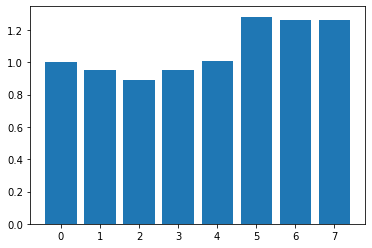

In [ ]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(dataCatEncoded, y)
X_fs = fs.transform(dataCatEncoded)

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### Using Kendall Correlation

In [ ]:
pd.concat([dataCatEncoded, y], axis=1).corr(method="kendall").style.background_gradient(cmap ='viridis')\
        .set_properties(**{'font-size': '20px'})

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke,avg_glucose_level
gender,1.000000,-0.030699,0.050075,-0.006505,-0.057798,0.021082,0.085546,0.008986,0.040250
ever_married,-0.030699,1.000000,-0.302642,0.006261,0.233834,0.164243,0.114644,0.108340,0.080338
work_type,0.050075,-0.302642,1.000000,-0.003514,-0.261590,-0.032074,-0.015397,-0.023062,-0.015635
Residence_type,-0.006505,0.006261,-0.003514,1.000000,0.007591,-0.007913,0.003092,0.015458,-0.010952
smoking_status,-0.057798,0.233834,-0.261590,0.007591,1.000000,0.100182,0.043118,0.024315,0.027986
hypertension,0.021082,0.164243,-0.032074,-0.007913,0.100182,1.000000,0.108306,0.127904,0.093128
heart_disease,0.085546,0.114644,-0.015397,0.003092,0.043118,0.108306,1.000000,0.134914,0.086856
stroke,0.008986,0.108340,-0.023062,0.015458,0.024315,0.127904,0.134914,1.000000,0.067404
avg_glucose_level,0.040250,0.080338,-0.015635,-0.010952,0.027986,0.093128,0.086856,0.067404,1.000000


## For Numerical Columns and Target Variable

### Using Pearson Correlation

In [ ]:
pd.concat([dataCatEncoded, y], axis=1).corr(method="pearson").style.background_gradient(cmap ='viridis')\
        .set_properties(**{'font-size': '20px'})

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke,avg_glucose_level
gender,1.000000,-0.031005,0.056422,-0.006738,-0.062581,0.020994,0.085447,0.008929,0.055180
ever_married,-0.031005,1.000000,-0.352722,0.006261,0.259647,0.164243,0.114644,0.108340,0.155068
work_type,0.056422,-0.352722,1.000000,-0.007316,-0.305927,-0.051761,-0.028023,-0.032316,-0.050513
Residence_type,-0.006738,0.006261,-0.007316,1.000000,0.008237,-0.007913,0.003092,0.015458,-0.004946
smoking_status,-0.062581,0.259647,-0.305927,0.008237,1.000000,0.111038,0.048460,0.028123,0.063437
hypertension,0.020994,0.164243,-0.051761,-0.007913,0.111038,1.000000,0.108306,0.127904,0.174474
heart_disease,0.085447,0.114644,-0.028023,0.003092,0.048460,0.108306,1.000000,0.134914,0.161857
stroke,0.008929,0.108340,-0.032316,0.015458,0.028123,0.127904,0.134914,1.000000,0.131945
avg_glucose_level,0.055180,0.155068,-0.050513,-0.004946,0.063437,0.174474,0.161857,0.131945,1.000000


# Permutation Based Feature Importance

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Feature: 0, Score: 0.03159
Feature: 1, Score: 0.04376
Feature: 2, Score: 0.01370
Feature: 3, Score: 0.00978
Feature: 4, Score: 0.03804
Feature: 5, Score: 0.03554
Feature: 6, Score: 0.01327
Feature: 7, Score: 0.01472
Feature: 8, Score: 0.01663
Feature: 9, Score: 0.01108
Feature: 10, Score: 0.02078


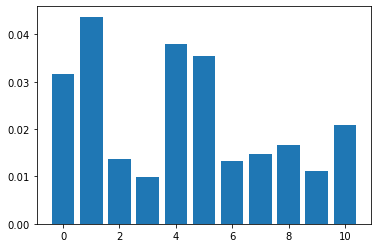

In [ ]:
model.fit(pd.concat([dataNum, dataCatEncoded], axis=1), y)
# perform permutation importance
results = permutation_importance(model, pd.concat([dataNum, dataCatEncoded], axis=1), y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Other Feature Importance Methods

### Fisher Scores

In [ ]:
from skfeature.function.similarity_based.fisher_score import fisher_score

In [ ]:
ranks = fisher_score(np.array(pd.concat([dataNum, dataCatEncoded], axis=1)), data.iloc[:, -1])

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/skfeature/utility/construct_W.py:194: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  class_idx_all = (class_idx[:, np.newaxis] & class_idx[np.newaxis, :])
/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/skfeature/utility/construct_W.py:194: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  class_idx_all = (class_idx[:, np.newaxis] & class_idx[np.newaxis, :])


<AxesSubplot:>

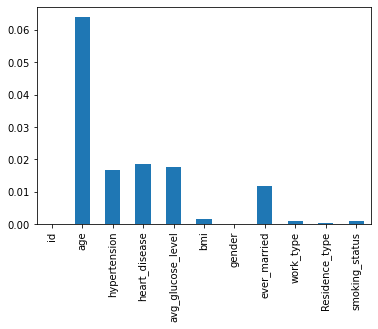

In [ ]:
pd.Series(ranks, pd.concat([dataNum, dataCatEncoded], axis=1).columns).plot.bar()

# Decision Trees Based Feature Importance

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

modelDT = DecisionTreeClassifier()
modelRF = RandomForestClassifier()

In [ ]:
modelDT.fit(pd.concat([dataNum, dataCatEncoded], axis=1), y)
modelRF.fit(pd.concat([dataNum, dataCatEncoded], axis=1), y)

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier()

Feature: 0, Score: 0.23926
Feature: 1, Score: 0.15102
Feature: 2, Score: 0.01467
Feature: 3, Score: 0.02044
Feature: 4, Score: 0.20961
Feature: 5, Score: 0.17941
Feature: 6, Score: 0.02112
Feature: 7, Score: 0.00971
Feature: 8, Score: 0.03326
Feature: 9, Score: 0.03983
Feature: 10, Score: 0.08167


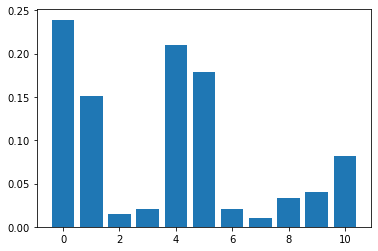

In [ ]:
importance = modelDT.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.20704
Feature: 1, Score: 0.19366
Feature: 2, Score: 0.02281
Feature: 3, Score: 0.02060
Feature: 4, Score: 0.21634
Feature: 5, Score: 0.17720
Feature: 6, Score: 0.02409
Feature: 7, Score: 0.01607
Feature: 8, Score: 0.04063
Feature: 9, Score: 0.02807
Feature: 10, Score: 0.05348


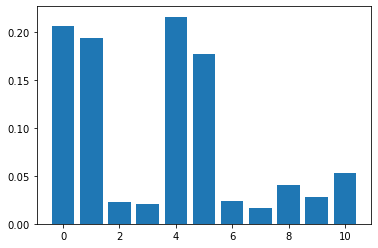

In [ ]:
importance = modelRF.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Automated Feature Selection

### Recursive Feature Selection

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

rfe.fit(pd.concat([dataNum, dataCatEncoded], axis=1), y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

In [ ]:
pd.DataFrame(rfe.transform(pd.concat([dataNum, dataCatEncoded], axis=1)))

,0,1,2,3,4
0,9046.0,67.0,228.69,36.600000,1.0
1,51676.0,61.0,202.21,28.893237,2.0
2,31112.0,80.0,105.92,32.500000,2.0
3,60182.0,49.0,171.23,34.400000,3.0
4,1665.0,79.0,174.12,24.000000,2.0
...,...,...,...,...,...
5105,18234.0,80.0,83.75,28.893237,2.0
5106,44873.0,81.0,125.20,40.000000,2.0
5107,19723.0,35.0,82.99,30.600000,2.0
5108,37544.0,51.0,166.29,25.600000,1.0


In [ ]:
rfe.ranking_

array([1, 1, 2, 6, 1, 1, 5, 7, 4, 3, 1])

In [ ]:
pd.concat([dataNum, dataCatEncoded], axis=1).iloc[:,4]

0       228.69
1       202.21
2       105.92
3       171.23
4       174.12
         ...  
5105     83.75
5106    125.20
5107     82.99
5108    166.29
5109     85.28
Name: avg_glucose_level, Length: 5110, dtype: float64

### Forward Feature Selection

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [ ]:
forwardFeatureSelection = SequentialFeatureSelector(modelRF, k_features="best", forward=True)

forwardFeatureSelection.fit(pd.concat([dataNum, dataCatEncoded], axis=1),y)

forwardFeatureSelection.k_feature_names_

### Backward Feature Selection

In [ ]:
backwardFeatureSelection = SequentialFeatureSelector(modelRF, k_features="best", forward=False)

backwardFeatureSelection.fit(pd.concat([dataNum, dataCatEncoded], axis=1),y)

backwardFeatureSelection.k_feature_names_

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ag78400/opt/

('id',
 'age',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'gender',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status')

### Exhaustive Feature Selection

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
efs = ExhaustiveFeatureSelector(modelRF)

In [ ]:
efs.fit(pd.concat([dataNum, dataCatEncoded], axis=1),y)

Features: 11/11

ExhaustiveFeatureSelector(estimator=RandomForestClassifier())

In [ ]:
pd.concat([dataNum, dataCatEncoded], axis=1).columns[efs.best_idx_]

'age'

# Thank YOu